In [1]:
import numpy as np
from matplotlib import pyplot as plt

import _pickle as cPickle

pickle_path = 'D:/Users/nickb/PycharmProjectsD/NomonWeb/data_processing/pvalues.pkl'

with open(pickle_path, 'rb') as fp:
    pvalue_dict = cPickle.load(fp)
pvalue_dict

{'Final Entry Rate (wpm)': 0.0054562167894811435,
 'Final Click Load (clicks/char)': 0.003251984444229162,
 'Final Correction Rate (%)': 0.03324873014150134,
 'Final Final Error Rate (%)': 0.4445867389117455,
 'Emoji Entry Rate (cpm)': 0.0013340704337693645,
 'Emoji Click Load (clicks/char)': 3.521649911172298e-05,
 'Emoji Correction Rate (%)': 0.01700778808800664,
 'Emoji Final Error Rate (%)': 0.4652088184521418}

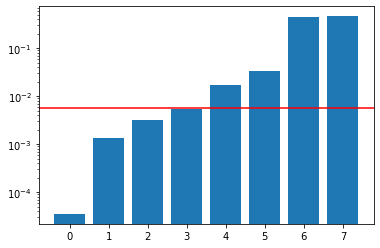

In [2]:
sorted_pvalues = [[key, float(pvalue_dict[key])] for key in pvalue_dict.keys()]
sorted_pvalues.sort(key=lambda x: x[1])

plt.bar(np.arange(len(sorted_pvalues)), np.array(np.array(sorted_pvalues).T[1], dtype=float), log=True)
plt.axhline(0.05/(len(sorted_pvalues)+1), color='r')

Emoji Click Load (clicks/char)  TRUE 0.005555555555555556 3.521649911172298e-05
Emoji Entry Rate (cpm)  TRUE 0.00625 0.0013340704337693645
Final Click Load (clicks/char)  TRUE 0.0071428571428571435 0.003251984444229162
Final Entry Rate (wpm)  TRUE 0.008333333333333333 0.0054562167894811435
Emoji Correction Rate (%)  FALSE 0.01 0.01700778808800664
Final Correction Rate (%)  FALSE 0.0125 0.03324873014150134
Final Final Error Rate (%)  FALSE 0.016666666666666666 0.4445867389117455
Emoji Final Error Rate (%)  FALSE 0.025 0.4652088184521418


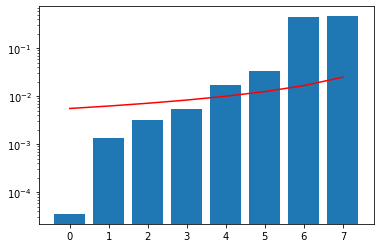

In [3]:
n = len(sorted_pvalues)+1
target_alpha = 0.05

hb_values = []
for rank in range(1, n):
    rank_hb = target_alpha / (n-rank+1)
    if (sorted_pvalues[rank-1][1] < rank_hb):
        print(sorted_pvalues[rank-1][0], " TRUE", rank_hb, sorted_pvalues[rank-1][1])
    else:
        print(sorted_pvalues[rank-1][0], " FALSE", rank_hb, sorted_pvalues[rank-1][1])
    hb_values.append(rank_hb)
    
plt.bar(np.arange(len(sorted_pvalues)), np.array(np.array(sorted_pvalues).T[1], dtype=float), log=True)
plt.plot(np.arange(len(hb_values)), hb_values, color='r')    
